#LAB-06-07

**Task-02 (reading and printing last 10 rows)**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
path = "/kaggle/input/cardataset/DataSet.csv"
df = pd.read_csv(path)


**Task-03(adding headers)**

In [23]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
headers

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

**Task-05(using for loop to count number of missing values in each column)**

In [28]:

missing_values_count = {}
for column in df.columns:
    missing_values = df[column].isna().value_counts()
    if True in missing_values.index:
        missing_values_count[column] = missing_values[True]
    else:
        missing_values_count[column] = 0
for column, count in missing_values_count.items():
    print(f"Column '{column}' has {count} missing values.")


Column 'symboling' has 0 missing values.
Column 'normalized-losses' has 40 missing values.
Column 'make' has 0 missing values.
Column 'fuel-type' has 0 missing values.
Column 'aspiration' has 0 missing values.
Column 'num-of-doors' has 2 missing values.
Column 'body-style' has 0 missing values.
Column 'drive-wheels' has 0 missing values.
Column 'engine-location' has 0 missing values.
Column 'wheel-base' has 0 missing values.
Column 'length' has 0 missing values.
Column 'width' has 0 missing values.
Column 'height' has 0 missing values.
Column 'curb-weight' has 0 missing values.
Column 'engine-type' has 0 missing values.
Column 'num-of-cylinders' has 0 missing values.
Column 'engine-size' has 0 missing values.
Column 'fuel-system' has 0 missing values.
Column 'bore' has 4 missing values.
Column 'stroke' has 4 missing values.
Column 'compression-ratio' has 0 missing values.
Column 'horsepower' has 2 missing values.
Column 'peak-rpm' has 2 missing values.
Column 'city-mpg' has 0 missing v

**Task-06(checking datatypes and typecasting them)**

In [29]:

columns_to_convert = ['normalized-losses', 'bore', 'stroke', 'peak-rpm', 'horsepower']
df[columns_to_convert] = df[columns_to_convert].astype(float)
print(df.dtypes)

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


# **Task-07**

# LAB-8-9

# Task:01(Linear-Regression)

In [37]:
df.duplicated().sum()

0

In [38]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
X = df[['engine-size']]
Y = df['price']


In [39]:
lm1.fit(X,Y)


LinearRegression()

In [40]:
Yhat=lm1.predict(X)

In [41]:
lm1.intercept_

-7962.440979163077

In [42]:
lm1.coef_


array([166.8621392])

# Task:02(Multiple-Linear-Regression)

In [43]:
lm2= LinearRegression()
Z = df[["normalized-losses","highway-mpg"]]
lm2.fit(Z, df['price'])


LinearRegression()

In [44]:
lm2.intercept_

38255.05667129213

In [45]:
lm2.coef_

array([   1.45409594, -821.58496582])

# Price = 38255.05 + 1.45 x normalized-losses - 821.58 x highway-mpg

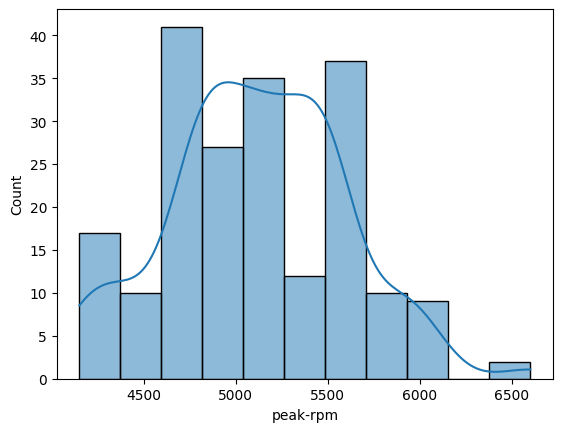

In [46]:
#checking the distribution
sns.histplot(df["peak-rpm"], kde=True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the size of the figure
width = 12
height = 10
plt.figure(figsize=(width, height))

# Plot "peak-rpm" regression plot with the line
sns.regplot(x="peak-rpm", y="price", data=df, fit_reg=True)
plt.ylim(0,)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
width = 12
height = 10
plt.figure(figsize=(width, height))
sn.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

# Task:04

In [49]:
lm2.fit(Z, df['price'])


LinearRegression()

In [50]:
Y_predict_multifit = lm2.predict(Z)

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
r_squared = lm2.score(Z, df['price'])
print('The R-squared is:', r_squared)

The R-squared is: 0.49721989180464454


In [52]:
Yhat_multifit = lm2.predict(Z)
print('The first four predicted values are:', Yhat_multifit[0:4])

The first four predicted values are: [16249.66229836 17071.24726418 13845.97943022 20418.65915678]


In [53]:
mse_multifit = mean_squared_error(df['price'], Yhat_multifit)
print('The mean square error of price and predicted value using multifit is:', mse_multifit)

The mean square error of price and predicted value using multifit is: 31753302.487802487


End Of Lab 